# CO2 Emission Forecast with Time Series

Access the competition [here](https://www.kaggle.com/txtrouble/carbon-emissions)

**Exploration**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [3]:
data = pd.read_csv('data/MER_T12_06.csv')

In [4]:
data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [12]:
data.loc[25]

MSN                                              CLEIEUS
YYYYMM                                            197413
Value                                            800.131
Column_Order                                           1
Description     Coal Electric Power Sector CO2 Emissions
Unit               Million Metric Tons of Carbon Dioxide
Name: 25, dtype: object

**Convert date to datetime object**

In [16]:
data.index = pd.to_datetime(data['YYYYMM'],format='%Y%m',errors='coerce')
data = data.drop(['YYYYMM'],axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5094 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
MSN             5094 non-null object
Value           5094 non-null object
Column_Order    5094 non-null int64
Description     5094 non-null object
Unit            5094 non-null object
dtypes: int64(1), object(4)
memory usage: 238.8+ KB


**Drop NA**

In [18]:
data = data.dropna()

**Convert values to float**

In [28]:
data['Value'] = pd.to_numeric(data['Value'],errors='coerce')
data = data.dropna()

**Data viz**

In [30]:
sources = data.groupby('Description')
sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


KeyError: "None of [DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',\n               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',\n               '1973-09-01', '1973-10-01',\n               ...\n               '2015-11-01', '2015-12-01',        'NaT', '2016-01-01',\n               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',\n               '2016-06-01', '2016-07-01'],\n              dtype='datetime64[ns]', name='YYYYMM', length=566, freq=None)] are in the [columns]"

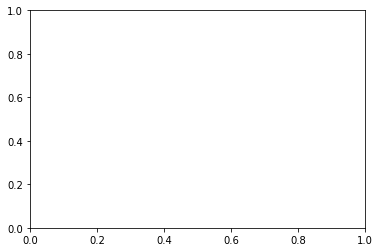

In [33]:
fig, ax = plt.subplots()
for desc, group in sources:
    group.plot(x = group.index, y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

KeyError: "None of [DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',\n               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',\n               '1973-09-01', '1973-10-01',\n               ...\n               '2015-11-01', '2015-12-01',        'NaT', '2016-01-01',\n               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',\n               '2016-06-01', '2016-07-01'],\n              dtype='datetime64[ns]', name='YYYYMM', length=566, freq=None)] are in the [columns]"

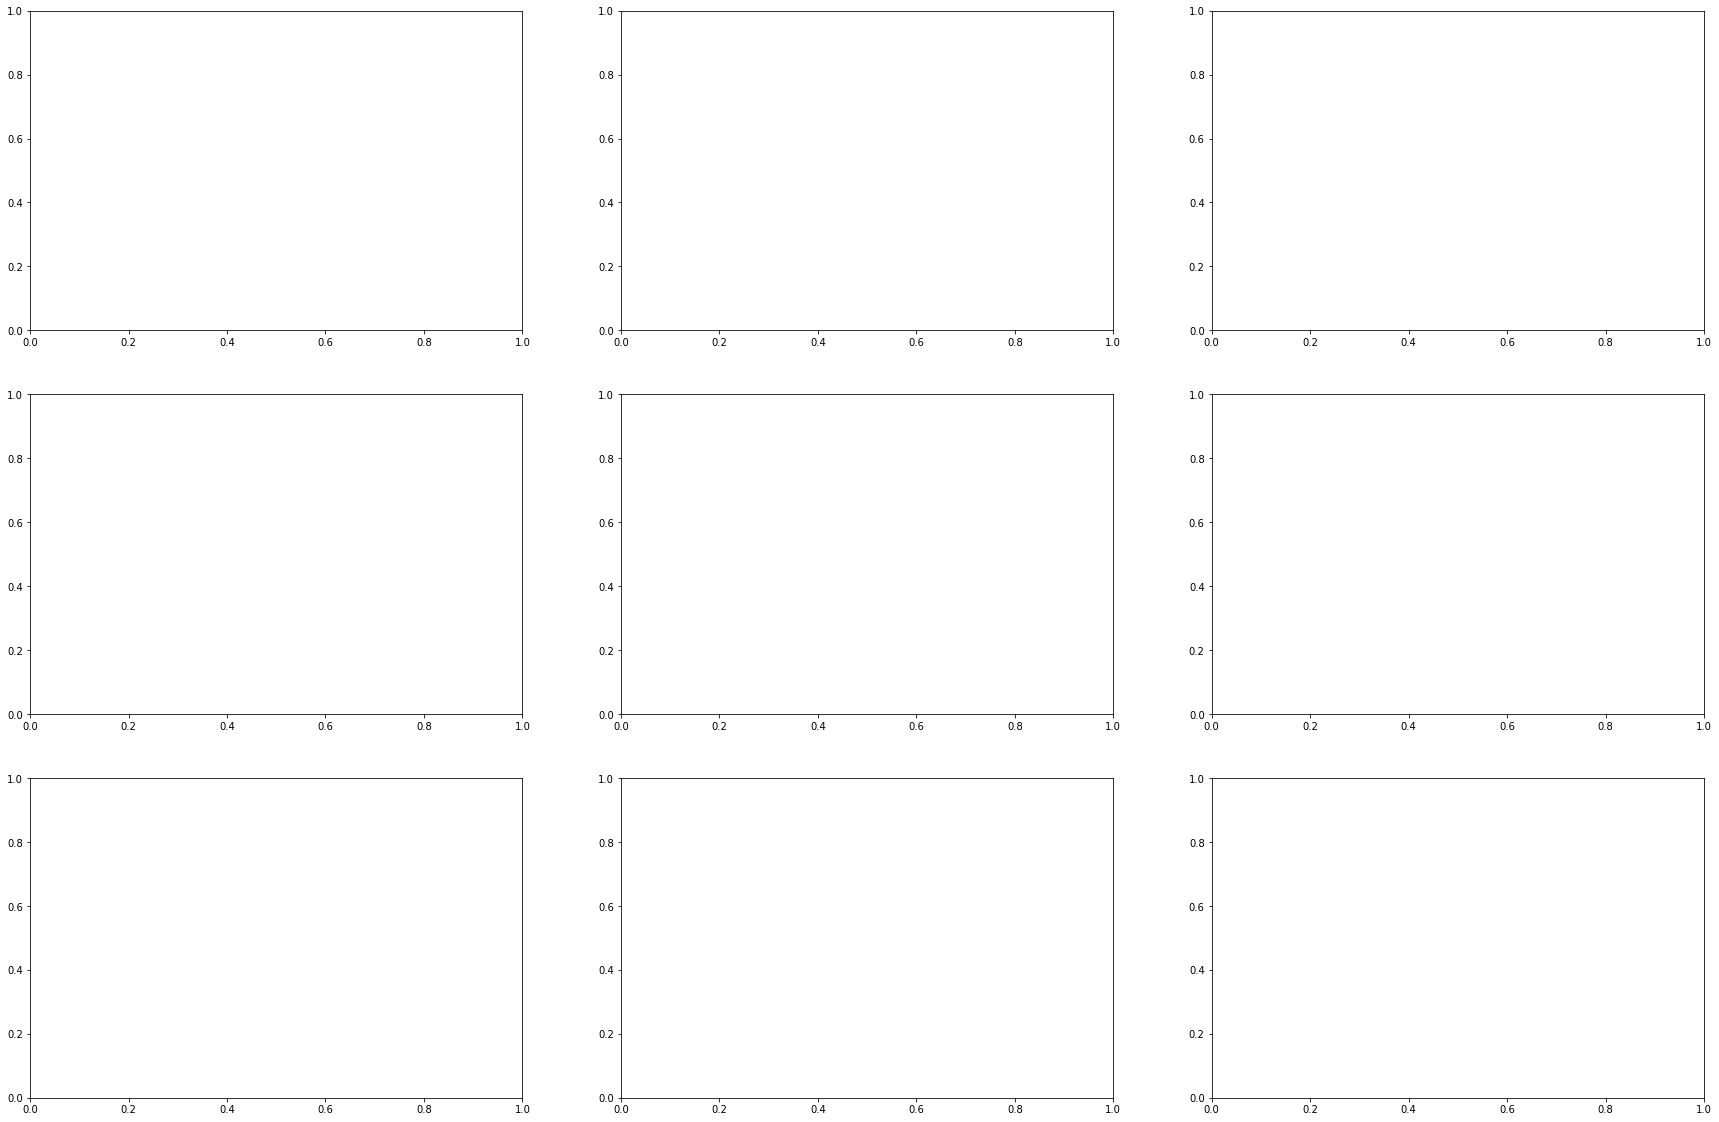

In [34]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(sources, axes.flatten()):
    group.plot(x = group.index, y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

In [36]:
CO2_per_source = data.groupby('Description')['Value'].sum().sort_values()


In [37]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

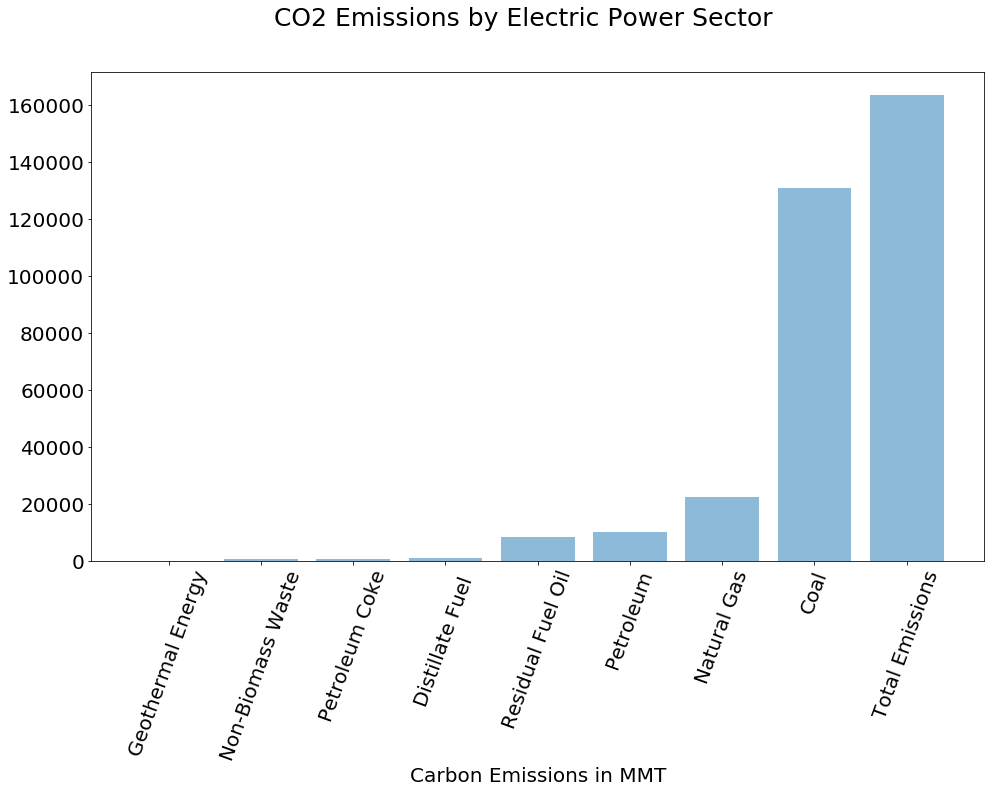

In [38]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

In [40]:
Emissions = data.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.TimeGrouper('M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [41]:
mte.tail()


YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

## Test Stationary

In [42]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

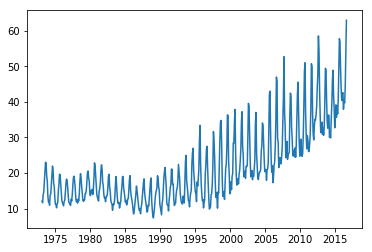

In [44]:
plt.plot(mte)

There is a trend with seasonal variation. Let's show that the process is not stationary

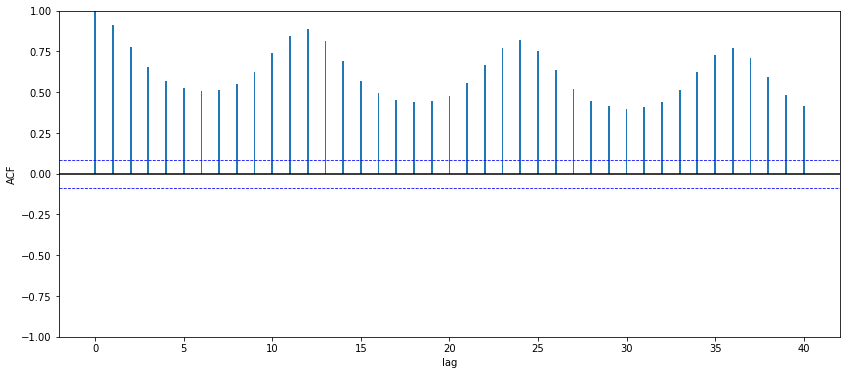

In [47]:
from statsmodels.tsa.stattools import acf, pacf
from functions import plot_sortie_acf

len = len(mte) # variable nécessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(mte)), len)

La sortie ACF présente une décroissance lente vers 0, ce qui traduit un problème de non-stationnarité. On revérifie et si c'est le cas on effectuera donc une différenciation (𝐼−𝐵).

**Test stationarité avec Dickey-Fuller**

In [52]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks()
    plt.yticks()
    
    plt.xlabel('Time in Years')
    plt.ylabel('Total Emissions')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block= True)

In [53]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

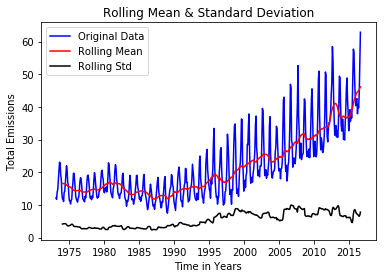

In [54]:
TestStationaryPlot(mte)

La moyenne (rouge) et la déviation standard (line noire) varie avec le temps. Il y a donc une tendance et il n'y a pas de stationnarité. 

In [55]:
TestStationaryAdfuller(mte)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


De plus, le test statistic est plus important que les valeurs critiques avec un niveau confiance de 90%, 95% et 99%. Nous ne pouvons donc pas rejeter l'hypothèse nulle. La série est non-stationnaire.

## Transformation

On estime la tendance du modèle et on la retire du processus.

**1. Par moyenne mobile**

On prends la moyenne des 12 mois consécutifs:

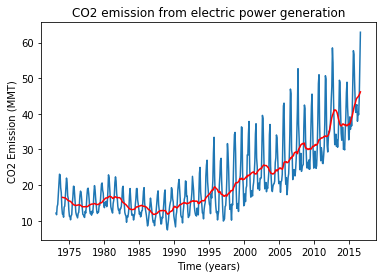

In [60]:
moving_avg = mte.rolling(12).mean()
plt.plot(mte)
plt.plot(moving_avg, color='red')
plt.xticks()
plt.yticks()
plt.xlabel('Time (years)')
plt.ylabel('CO2 Emission (MMT)')
plt.title('CO2 emission from electric power generation')
plt.show()

On la retire et on étudie le résultat:

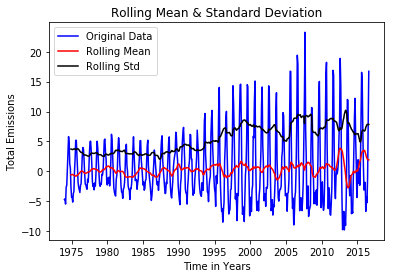

In [61]:
mte_moving_avg_diff = mte - moving_avg
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

In [62]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                  -5.138977
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


La moyenne mobile varie beaucoup moins et le test statistique est plus petit que les valeurs critiques 1%,5% et 10%/ On peut donc dire avec un intervalle de confiance de 99% que le dataset est une série stationnaire.

**2. Lissage Exponentiel**

Les valeurs récentes ont plus de poids aue les valeurs légères.

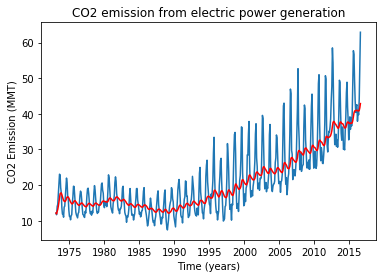

In [70]:
mte_exp_wighted_avg = mte.ewm(halflife=12).mean()
plt.plot(mte)
plt.plot(mte_exp_wighted_avg, color='red')
plt.xticks()
plt.yticks()
plt.xlabel('Time (years)')
plt.ylabel('CO2 Emission (MMT)')
plt.title('CO2 emission from electric power generation')
plt.show()

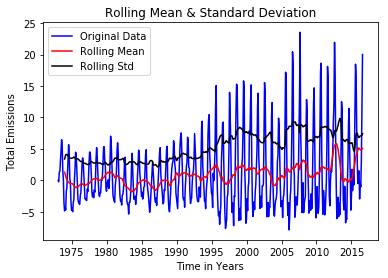

In [71]:
mte_ewma_diff = mte - mte_exp_wighted_avg
TestStationaryPlot(mte_ewma_diff)

In [72]:
TestStationaryAdfuller(mte_ewma_diff)


Test Statistic                  -3.423915
p-value                          0.010170
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


La moyenne et la déviation standard ont moins de variation que précédemment. De plus, on a le test statistique bien en dessous des valeurs critiques. La série est bien stationnaire avec un intervalle de confiance de 95%.

**3. Eliminer tendance et saisonnalité par différentiation**

La série présente un accroissement de saisonnalité suivant un modèle additif. On n'a donc pas besoin de considérer $Y_t=ln(X_t)$ comme lors d'un modèle multiplicatif.

On effectue une différenciation $(𝐼−𝐵)$

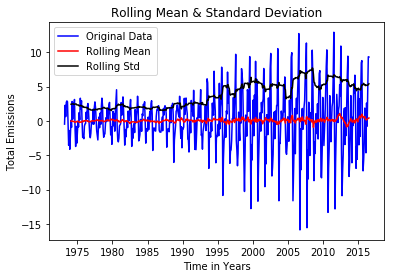

In [73]:
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [74]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Cette différence améliore la stationnarité de façon significative. Il semble y avoir également des pics par multiple de 12 donc utilisons cette fois la différenciation $(I−B^{12})$

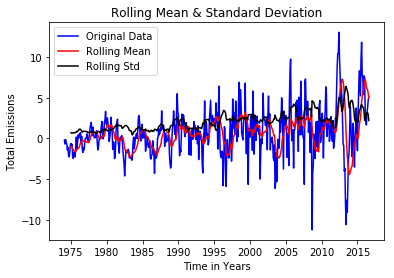

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [76]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

Le résultat est bien améliorer de manière significatif. On séquence donc ces deux opérations:

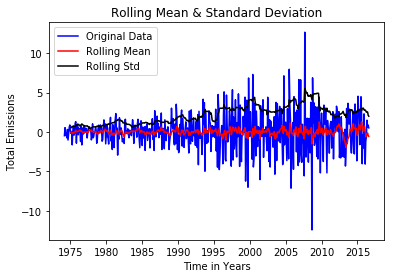

In [77]:
mte_first_difference = mte - mte.shift(1) 
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [78]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Nous avons donc un processus stationnaire.

**4. Décomposition**

Nous allons commencer par modéliser la tendance et saisonnalité et les retirer du modèle.

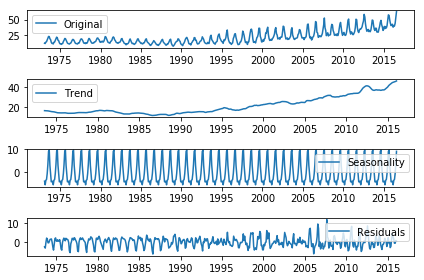

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mte)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(mte, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Essayons de regarder la stationnarité des résidus:

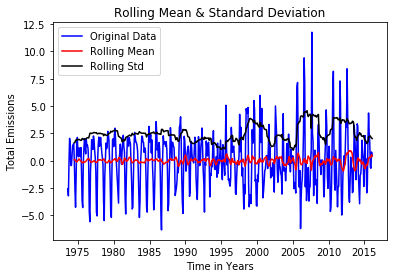

Test Statistic                -8.547084e+00
p-value                        9.439345e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.910000e+02
Critical Value (1%)           -3.443739e+00
Critical Value (5%)           -2.867444e+00
Critical Value (10%)          -2.569915e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [80]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

## Paramètres optimaux et modèle SARIMA:

L'objectif est de trouver un modèle SARIMA(p,d,q)(P,D,Q,s) qui optimise notre metric choisie de façon à ce que les résidus puissent être assimilés à des bruits blancs (indépendants entre eux et dans le temps). Les paramètres sont:
- l'ordre p du processus AutoRégressif (AR): dépendance des variables dans le temps jusqu'à t-p
- l'ordre q du processus de Moyenne Mobile (MA): combinaison linéaire des erreurs dans le temps jusqu'à t-q
- nombre de différences d: nombre de différence non-saisonnale

Par soucis de simplicité, on considère (P,D,Q)=(p,d,q)

**1. Recherche sur le graph**

Pour ce faire, on lit les autocorrélations simples et partielles pour sélectionner les paramètres.

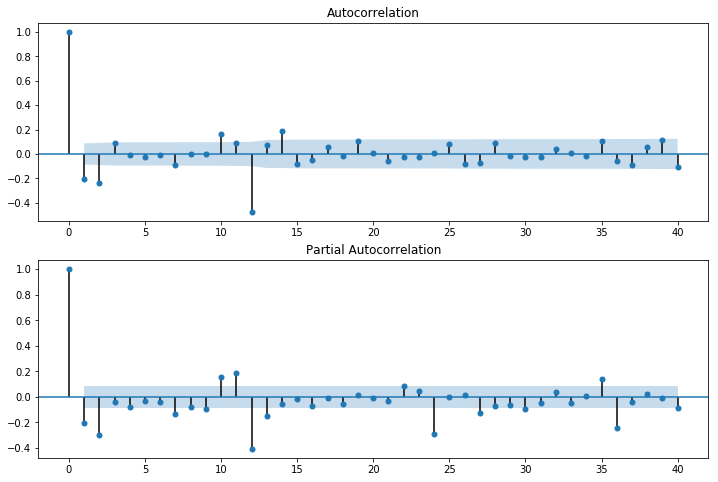

In [82]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

**2. Grid Search**

Par manque de temps (car manque d'expérience), on va rechercher les paramètres optimaux par un grid search (optimisation des hyperparamètres). On explore le champs des paramètres possiblèes en évaluant sur un critère choisi les différents modèles générés et on choisit le plus performant.

In [84]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA:')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


On choisit le critère d'information de Akaike (AIC), afin de mesurer à quel point le modèle est performant au regard de sa complexité.

In [90]:
scores = []
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results = mod.fit()
        scores.append(['ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic)])

scores

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packa

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packa

[['ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:4804.065995091217'],
 ['ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:4135.625648186431'],
 ['ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2572.1947577443707'],
 ['ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2504.2095028358426'],
 ['ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2544.1464266167964'],
 ['ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2465.14726299798'],
 ['ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2511.043139693216'],
 ['ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2505.840238070917'],
 ['ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:4157.561225515779'],
 ['ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3572.105902164729'],
 ['ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2334.7247254086'],
 ['ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2245.507386420837'],
 ['ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2329.0446013814726'],
 ['ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2218.6800975071988'],
 ['ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2262.0627979899627'],
 ['ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2247.5327721889016'],
 ['ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2932.133574305

La plus petite valeur AIC est SARIMAX(1,1,1)(0,1,1,12) avec une AIC de 2003.553

On a donc identifié les paramètres optimaux de notre modèle SARIMAX. On peut donc procéder à une analyse en détail de ce modèle.

In [96]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                          Statespace Model Results                                         
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Wed, 08 May 2019   AIC                           2003.553
Time:                                                     00:18:00   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

On a la colonne des coefficients qui montre l'importance de chaque feature sur le processus.

La colonne $P>|z|$ nous informe de la signifiance de chaque poids de cariable. Les poids ont une p-value proche de 0, et sont donc raisonnables à ajouter aux features du modèles.

Regardons maintenant les résidus.

count    523.000000
mean       0.144267
std        1.885626
min       -6.528428
25%       -0.791260
50%        0.126975
75%        1.040648
max       12.175000
dtype: float64


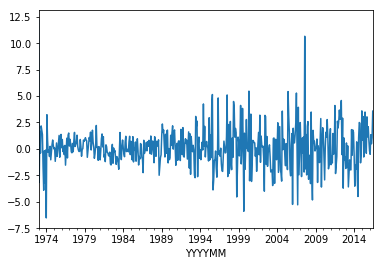

In [98]:
results.resid.plot()
print(results.resid.describe())

On observe un biais dans la prédiction en regardant la distribution plotée.

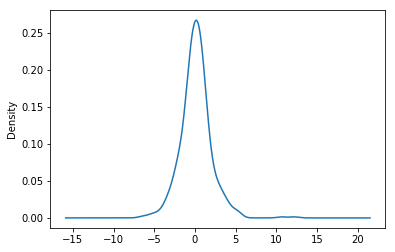

In [100]:
results.resid.plot(kind='kde')


Les erreurs sont bien gaussiennes, essayons de vérifier qu'elles sont centrées en 0.

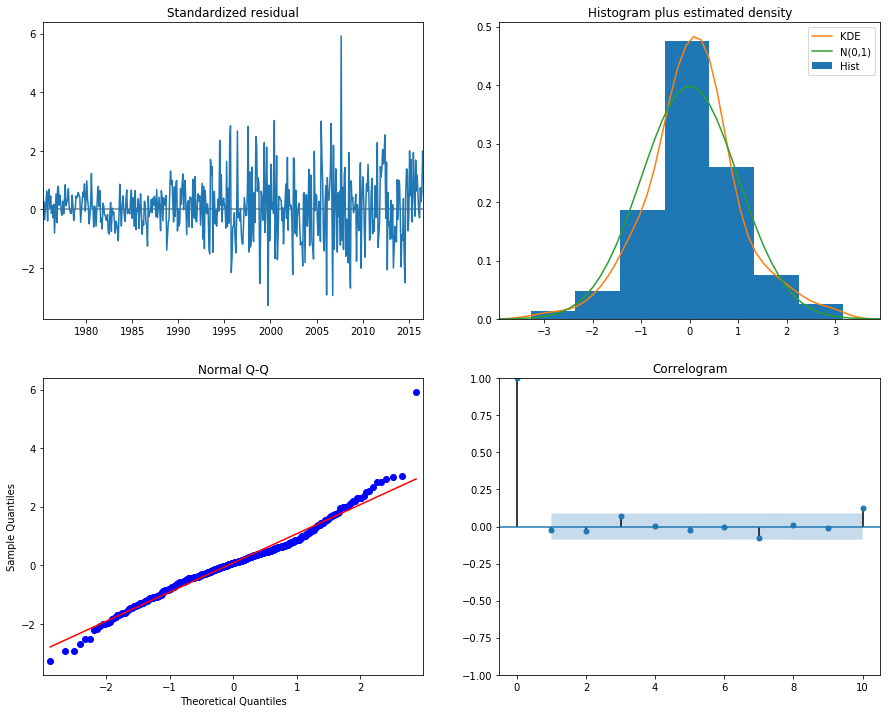

In [102]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Les résidus sont bien non corrélées et suivent une loi de distribution normale centrée en 0 car:
- Histogramme en haut à droite: la ligne orange KDE suit à peu près N(0,1) distribution normale centrée en 0 et de déviation standard 1.
- Le Q-Q en bas à gauche montre que la distribution des résidus suit la distribution normale standard.
- Avec le temps en haut à gauche, on ne voit pas de saisonnalité claire et apparissent donc comme du bruit blanc. L'auto-corrélation en bas à droite montre également que les résidus ont une faible corrélation avec du lag.

Le modèle produit est donc satisfaisant pour comprendre notre processus et prédire les valeurs futures.

## Validation

On commence les prédictions par une comparaison avec les valeurs réelles du processus pour estimer l'accuracy de notre prédiction.

On set dynamic=False afin de produire les forecasts un par un en utilisant tout l'historique disponible jusqu'à ce point.

In [104]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int() #confidence interval
pred_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2013-01-31,30.203839,37.257329
2013-02-28,29.088384,36.141873
2013-03-31,28.958989,36.012479
2013-04-30,30.708076,37.761565
2013-05-31,32.104083,39.157572


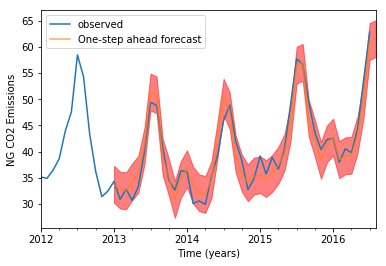

In [107]:
ax = mte['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

Notre modèle a l'air de s'aligner correctement et de montrer un comportement similaire.

Vérifion l'accuracy de notre prédiction avec la MSE (Mean Squared Error ou Erreur Quadratique Moyenne) qui donne l'erreur moyenne. On n'utilise pas la MAE (Mean Absolute Error ou Erreur Absolue Moyenne) car il ne faut pas que les différences s'annulent.

In [128]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is ',round(mse, 2))
print('The Mean Squared Error (MSE) of the forecast is ',np.sqrt(sum((mte_forecast-mte_truth)**2)/mte_forecast.shape[0]))


The Mean Squared Error (MSE) of the forecast is  4.09
The Mean Squared Error (MSE) of the forecast is  nan


In [129]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

Le but étant de développer un modèle utilisant une prédiction dynamique, on utilise les informations jusqu'à un certain point dans le passé. On voit que l'on conserve une bonne prédiction.

In [130]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

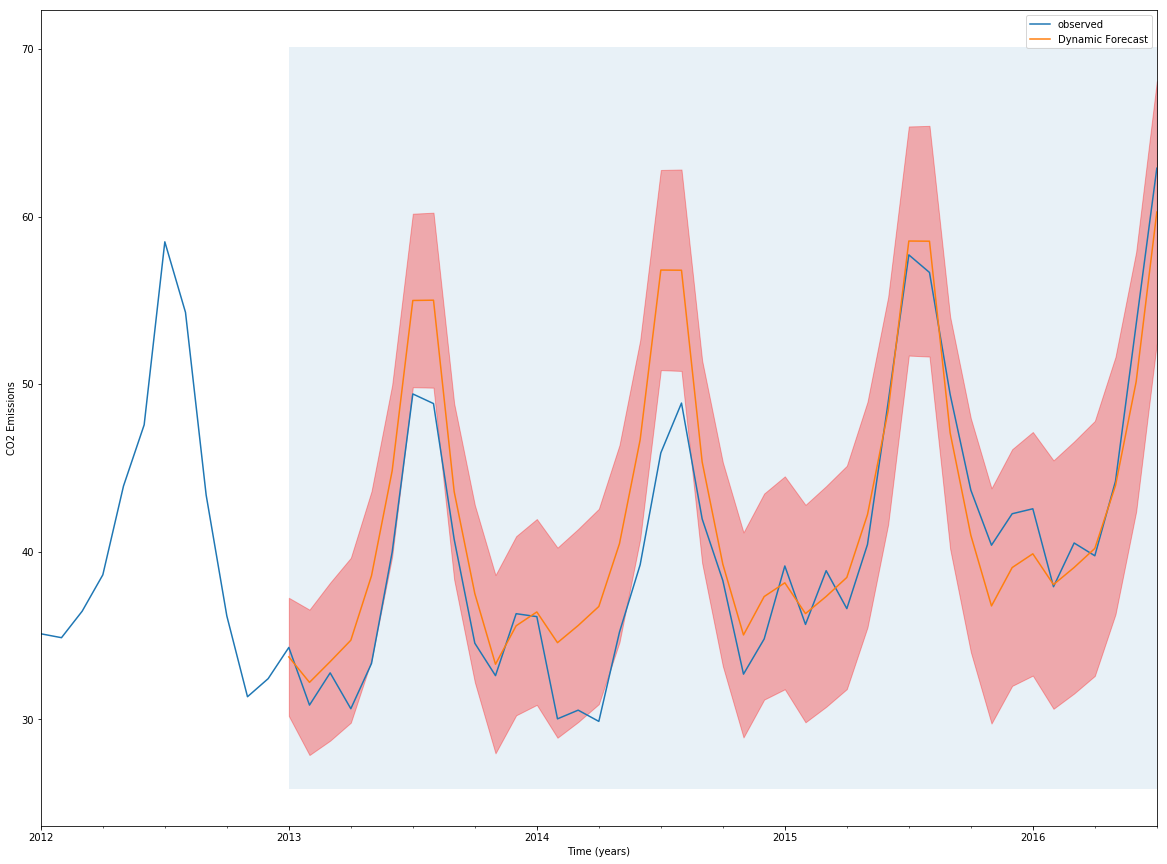

In [131]:
ax = mte['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [133]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/mte_forecast.shape[0])))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forcast: 3.7936


## Prédiction

In [134]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2016-08-31,58.062561,65.116050
2016-09-30,47.316617,55.987496
2016-10-31,40.736077,50.163097
2016-11-30,36.175930,46.010290
2016-12-31,38.095119,48.172702


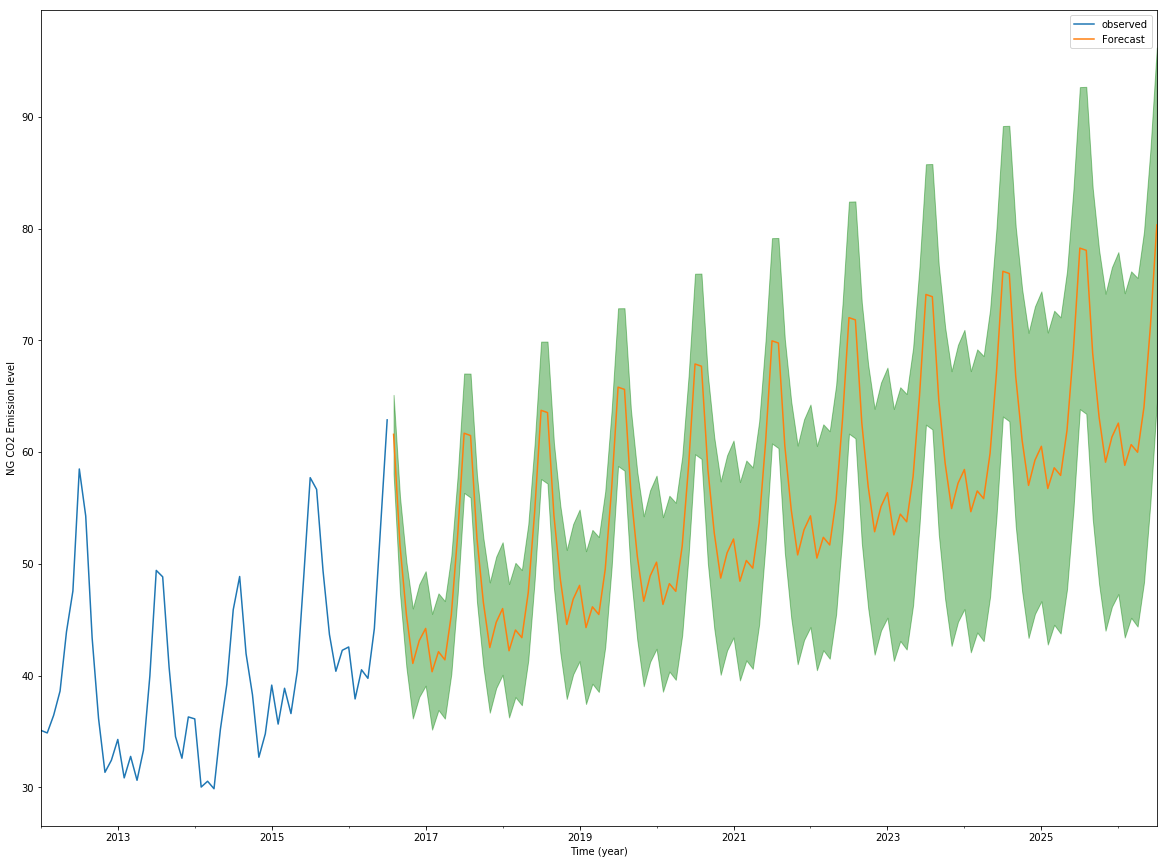

In [138]:
ax = mte['2012':].plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()